In [19]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math 

from scipy.integrate import odeint#pretty classic, generic interface class to solve an equation system y'(t)=f(t,y)
from scipy.integrate import solve_ivp#more customizable

### Solving Differential euqations using Python solvers
* [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
* [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

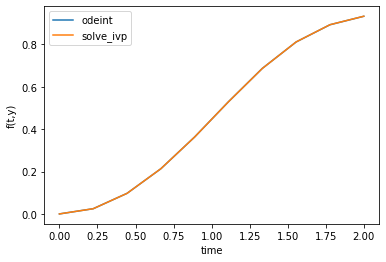

In [30]:
#function that returns dy/dt
def model(t,y):
    return -y**3+math.sin(t)

#initial condition
y0=0 #y value at t0

#time points
t=np.linspace(0,2,num=10)

y1=odeint(func=model,y0=y0,t=t,tfirst=True)#tfirst means that the first two arguments of func must be t,y(default: y,t)
plt.plot(t,y1,label='odeint')
plt.xlabel('time')
plt.ylabel('f(t,y)')


y2=solve_ivp(fun=model,t_span=(0,max(t)),y0=[y0],t_eval=t)#fun(t,y)
plt.plot(t,y2['y'][0],label='solve_ivp')
plt.legend()



### Solving Diff Eqn Numerically
construct a seq of Euler approx to the function y(t) that satisfies the conditions
$y'=\frac{1}{1+t^2}$ and y(0)=0

Euler, RK2
$y(t)=\int \frac{1}{1+t^2} dx$ from x=0 to x=t(Riemann sums, trapezoid, Simpson's) y(t)=arctan(t)

estimate y(1)


1. Euler method
2. Improved Euler(RK2)
3. RK4 
$y_{n+1}=y_n+\frac{1}{6}*(k_1+2k_2+2k_3+k_4)h$

$k_1=f(t_n,y_n)$

$k_2=f(t_n+\frac{h}{2},y_n+h\frac{k_1}{2})$

In [2]:
#x0,y0 are the initial conditions
#dx is the step size you want to take
#x is the point where you want to get an estimation
def Euler_method(x0,y0,dx,x):
    n=int((x-x0)/dx)#the number of steps you need to take for your approx
    for i in range(n):
        slope=lambda x,y: -y**3+math.sin(x) #modify the code to reflect the derivative(slope)
        dy=slope(x0,y0)*dx
        y0+=dy#update y values
        x0+=dx#update x values
    print(str(x0),str(round(y0,6)))

In [5]:
Euler_method(0,0,0.2,2)

1.9999999999999998 0.953441


In [7]:
#Runge-Kutta 2, RK2, Heun method
def Euler_improved(x0,y0,dx,x):
    slope=lambda x,y:-y**3+math.sin(x)#modify the derivative formula 
    
    n=int((x-x0)/dx)#the number of steps you need to take for your approx
    for i in range(n):
        y_next=y0+dx*slope(x0,y0)#find our next possible y value using Euler's method
        y0+=dx/2*(slope(x0,y0)+slope(x0+dx,y_next))
        x0+=dx
    print(str(x0),str(round(y0,3)))

Euler_improved(0,0,0.02,2)

2.0000000000000013 0.932


In [36]:
#RK4
def RK4(x0,y0,dx,x):
    slope=lambda x,y:-y**3+math.sin(x)#modify the derivative formula 
    
    n=int((x-x0)/dx)#the number of steps you need to take for your approx
    for i in range(n):
        k1=slope(x0,y0)
        k2=slope(x0+dx/2,y0+dx*k1/2)
        k3=slope(x0+dx/2,y0+dx*k2/2)
        k4=slope(x0+dx,y0+dx*k3)
        y0+=1/6*(k1+2*k2+2*k3+k4)*dx
        x0+=dx
    print(str(x0),str(round(y0,4)))
    

In [38]:
RK4(0,0,0.2,2)

1.9999999999999998 0.9324


### Comparisons of Diff Methodologies

In [41]:
def Euler_method1(slope,x0,y0,dx,x):
    n=int((x-x0)/dx)#the number of steps you need to take for your approx
    
    x_vals=[x0]
    y_vals=[y0]
    for i in range(n):
#         slope=lambda x,y: -y**3+math.sin(x) #modify the code to reflect the derivative(slope)
        dy=slope(x0,y0)*dx
        y0+=dy#update y values
        x0+=dx#update x values
        x_vals.append(x0)
        y_vals.append(y0)
#     print(str(x0),str(round(y0,6)))
    return x_vals,y_vals


def Euler_improved2(slope,x0,y0,dx,x):
#     slope=lambda x,y:-y**3+math.sin(x)#modify the derivative formula 
    
    n=int((x-x0)/dx)#the number of steps you need to take for your approx
    x_vals=[x0]
    y_vals=[y0]
    
    for i in range(n):
        y_next=y0+dx*slope(x0,y0)#find our next possible y value using Euler's method
        y0+=dx/2*(slope(x0,y0)+slope(x0+dx,y_next))
        x0+=dx
        x_vals.append(x0)
        y_vals.append(y0)
#     print(str(x0),str(round(y0,3)))
    return x_vals,y_vals


def RK4_new(slope,x0,y0,dx,x):
#     slope=lambda x,y:-y**3+math.sin(x)#modify the derivative formula 
    
    n=int((x-x0)/dx)#the number of steps you need to take for your approx
    x_vals=[x0]
    y_vals=[y0]
    
    for i in range(n):
        k1=slope(x0,y0)
        k2=slope(x0+dx/2,y0+dx*k1/2)
        k3=slope(x0+dx/2,y0+dx*k2/2)
        k4=slope(x0+dx,y0+dx*k3)
        y0+=1/6*(k1+2*k2+2*k3+k4)*dx
        x0+=dx
        x_vals.append(x0)
        y_vals.append(y0)
    #print(str(x0),str(round(y0,4)))
    return x_vals,y_vals


Exact ans y at t= 2 : [5.30547159]
Euler approx: 5.252784018508783 w/ error [-0.05268757]
Improved Euler approx: 5.304692225005321 w/ error [-0.00077936]
RK4 approx: 5.30547193913935 w/ error [3.49995501e-07]


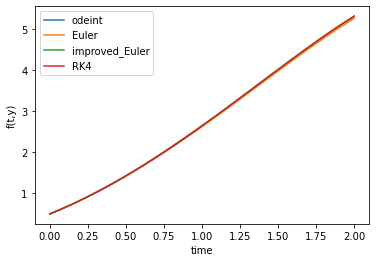

In [56]:

def model(t,y):
    return y-t**2+1

def Rk_comparison(model,x0,y0,dx,x):
    num=int((x-x0)/dx)#number of iterations
    t=np.linspace(x0,x,num)
    
    #exact solution
    y1=odeint(func=model,y0=y0,t=t,tfirst=True)#tfirst=True means that the first two arguments of func must be t,y(default: y,t)
    
    #approximations
    EulerX,EulerY=Euler_method1(model,x0,y0,dx,x)
    Euler_iX,Euler_iY=Euler_improved2(model,x0,y0,dx,x)
    RK4_X,RK4_Y=RK4_new(model,x0,y0,dx,x)
    
    #error
    print("Exact ans y at t=",x,':',y1[-1])
    print("Euler approx:",EulerY[-1],'w/ error',EulerY[-1]-y1[-1])
    print("Improved Euler approx:",Euler_iY[-1],'w/ error',Euler_iY[-1]-y1[-1])
    print('RK4 approx:',RK4_Y[-1],'w/ error', RK4_Y[-1]-y1[-1])
    #graphs
    plt.plot(t,y1,label='odeint')
    plt.plot(EulerX,EulerY,label='Euler')
    plt.plot(Euler_iX,Euler_iY,label='improved_Euler')
    plt.plot(RK4_X,RK4_Y,label='RK4')
    plt.xlabel('time')
    plt.ylabel('f(t,y)')
    plt.legend()
    
Rk_comparison(model,0,0.5,0.02,2)
    

Let us dedicate some time for taylor series

approx f(h)=$\sin h$ 
given x0=0
using the algorithm to approx $P_4 (h)$ (Taylor approx)